<a href="https://colab.research.google.com/github/lessons-data-ai-engineer/project_3-prepare_data_for_public_health_agency/blob/main/Fusilier_Antoine_1_notebook_112023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploration initiale des données

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
pip install pycountry

In [12]:
!pip install scikit-learn

In [13]:
pip install gdown

## 1.1. Importation des bibliothèques nécessaires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import pycountry
import gdown

## 1.2 Paramétrages des methodes de bibliothèques (si nécessaire)

- Aucun (pour l'instant)

## 1.3 Chargement des données
Ici nous avons récupérer les données via le site d'Open Food Facts (https://static.openfoodfacts.org/) au format csv, que nous avons stocker dans le dossier associé "Resources"
Instanciation dans la variable "dfs" pour regrouper les dataframes
___Attention le chargement des données est couteuse en ressources, assurez-vous d'avoir les ressources matérielles nécessaire pour exécuter la lecture de 8go de données (3 à 10 millions de lignes)___

In [ ]:
file_id = '1LsirNjjdY0uTLzEXKeG3r2SoUb8mlBwe'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'df_temp.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1LsirNjjdY0uTLzEXKeG3r2SoUb8mlBwe
From (redirected): https://drive.google.com/uc?id=1LsirNjjdY0uTLzEXKeG3r2SoUb8mlBwe&confirm=t&uuid=0038a165-cf87-4da5-860e-1fb34f89e18b
To: /content/df_temp.csv
100%|██████████| 847M/847M [00:18<00:00, 45.1MB/s]


'df_temp.csv'

In [ ]:
dfs = {}
dfs['load_data_130'] = pd.read_csv('df_temp.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')

<ipython-input-7-4f290762ef28>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfs['load_data_130'] = pd.read_csv('df_temp.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
<ipython-input-7-4f290762ef28>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfs['load_data_130'] = pd.read_csv('df_temp.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
Skipping line 35984: '	' expected after '"'
Skipping line 153938: '	' expected after '"'
Skipping line 153939: '	' expected after '"'
Skipping line 153940: '	' expected after '"'
Skipping line 169607: '	' expected after '"'


## 1.4 Aperçu des premières lignes, types de données, statistiques descriptives

### 1.4.1 Visualiser les premières et dernières lignes de donnnées

In [ ]:
print(f"Dataframe (Values.count(), Columns.count()) : ", dfs['load_data_130'].shape)

Dataframe (Values.count(), Columns.count()) :  (320767, 162)


Afin de visualiser le nombre de colonnes et de valeurs.

Les premières lignes :

In [ ]:
dfs['load_data_130'].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici, j'affiche les cinq premières lignes du DataFrame df pour avoir un aperçu initial des données. Cela me permet de voir rapidement comment les données sont structurées, les noms des colonnes, et quelques exemples de valeurs.

Les dernières lignes :

In [ ]:
dfs['load_data_130'].tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320762,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320764,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ensuite, j'examine les cinq dernières lignes du DataFrame pour observer si les derniers enregistrements suivent la même structure que les premiers et pour vérifier l'uniformité des données jusqu'à la fin du dataset.

In [14]:
dfs['load_data_130'].columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### 1.4.2. Analyse des types de données

Liste des type de données pour chaque colonnes

In [ ]:
dfs['load_data_130'].dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

Cette commande me permet de lister les types de données de chaque colonne dans le DataFrame. C'est crucial pour identifier les colonnes qui peuvent nécessiter une conversion de type, par exemple, transformer des chaînes de caractères en dates ou en nombres.

### 1.4.3. Statistiques descriptives

In [15]:
dfs['load_data_130'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320767 entries, 0 to 320766
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Ici, j'utilise df.info() pour obtenir un résumé concis du DataFrame, y compris le nombre d'entrées non nulles par colonne et le type de données, ce qui est utile pour repérer les colonnes avec des valeurs manquantes.

#### 1.4.3.1. Résumé statistique

In [16]:
dfs['load_data_130'].describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248934.000000,248934.000000,0.0,248934.000000,0.0,0.0,2.611080e+05,857.000000,243886.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221206.000000,221206.000000,0.0,0.0
mean,NaN,1.936047,0.019660,NaN,0.055248,NaN,NaN,1.141908e+03,585.501214,12.730394,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165488,9.058000,NaN,NaN
std,NaN,2.502036,0.140526,NaN,0.269210,NaN,NaN,6.447215e+03,712.809943,17.578871,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055924,9.183612,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [17]:
dfs['load_data_130'].describe(include=[np.object_, pd.Categorical])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
count,320744,320744,320765,320764,320758,320767,320767,303005,52795,104819,...,221206,91513,94491,320721,320721,320721,84366,84366,75836,75836
unique,320744,320744,3535,189567,189568,180495,180495,221342,38584,13826,...,5,14,42,1021,1021,1021,3543,3543,75836,75836
top,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...
freq,1,1,169863,20,20,33,33,410,201,4669,...,62760,22624,22624,168900,168900,168900,6054,6054,1,1


Avec df.describe(), je génère un résumé statistique des colonnes numériques, qui inclut la moyenne, l'écart type, les valeurs minimales et maximales, et les quantiles. En utilisant df.describe(include=[np.object_, pd.Categorical]), j'étends ce résumé aux données catégorielles et textuelles pour comprendre la distribution des catégories.

In [ ]:
dfs['load_data_130'].info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320767 entries, 0 to 320766
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

#### 1.4.3.2. Fréquence et modes

In [ ]:
dfs['load_data_130'].mode()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055829,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,7.2,0.0,15.0,30.0,NaN,0.0,0.0,0.0,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,NaN,1489077120,2017-03-09T16:32:00Z,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320739,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320740,99567453,http://world-fr.openfoodfacts.org/produit/9956...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320741,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320742,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici, j'identifie le mode de chaque colonne, c'est-à-dire la valeur la plus fréquemment apparue. Cela est particulièrement utile pour comprendre les tendances centrales des données catégorielles.

L'analyse des modes de ces colonnes nous offre une fenêtre sur les tendances dominantes du dataset. Cela inclut les produits les plus courants, les marques prédominantes, et les catégories de produits les plus fréquentes. Ces informations peuvent être extrêmement utiles pour orienter les décisions marketing, la gestion de stock, ou pour approfondir des analyses spécifiques sur les habitudes de consommation.

Pour chaque colonne, identifier le mode nous aide à comprendre quelles valeurs prédominent, ce qui peut être un point de départ pour des analyses plus détaillées, comme enquêter sur les raisons de la prévalence de certaines marques ou produits, ou comprendre la distribution des catégories de produits au sein d'un marché spécifique.

#### 1.4.3.3. Mesure de tendance centrale

In [ ]:
dfs['load_data_130'].mean()

In [ ]:
dfs['load_data_130'].median()

Je calcule la moyenne et la médiane pour chaque colonne numérique. Ces mesures de tendance centrale me donnent une idée de la valeur "typique" pour chaque colonne en minimisant l'impact des valeurs extrêmes.

#### 1.4.3.4. Mesure de dispersion

In [ ]:
dfs['load_data_130'].var()

In [ ]:
dfs['load_data_130'].std()

NameError: name 'dfs' is not defined

En calculant la variance (df.var()) et l'écart type (df.std()), j'évalue la dispersion des données autour de la moyenne. Ces mesures m'aident à comprendre la variabilité des données dans chaque colonne.

#### 1.4.3.5. Mesure de forme de distribution

In [ ]:
dfs['load_data_130'].skew()

<ipython-input-14-3f0d1d5ff862>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs['load_data_130'].skew()


code                           541.190164
no_nutriments                         NaN
additives_n                      2.175354
ingredients_from_palm_oil_n      7.174677
ingredients_from_palm_oil             NaN
                                  ...    
carbon-footprint_100g            2.771240
nutrition-score-fr_100g          0.114854
nutrition-score-uk_100g          0.132024
glycemic-index_100g                   NaN
water-hardness_100g                   NaN
Length: 107, dtype: float64

In [ ]:
dfs['load_data_130'].kurt()

<ipython-input-15-46638ecc7cd2>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs['load_data_130'].kurt()


code                           299616.284508
no_nutriments                            NaN
additives_n                         7.417783
ingredients_from_palm_oil_n        51.792561
ingredients_from_palm_oil                NaN
                                   ...      
carbon-footprint_100g              10.291310
nutrition-score-fr_100g            -1.018877
nutrition-score-uk_100g            -1.075512
glycemic-index_100g                      NaN
water-hardness_100g                      NaN
Length: 107, dtype: float64

Enfin, j'examine l'asymétrie (df.skew()) et le kurtosis (df.kurt()) des distributions des colonnes numériques. L'asymétrie me renseigne sur le degré et la direction de l'asymétrie de la distribution, tandis que le kurtosis indique si les données sont plus ou moins concentrées autour de la moyenne par rapport à une distribution normale.

#### 1.4.3.6. Corrélations et tableaux croisés

Pour commencer, j'ai exploré les corrélations entre les variables numériques de mon dataset en utilisant la fonction corr() :

In [ ]:
dfs['load_data_130'].corr()

<ipython-input-16-7b3ecdcfe5b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs['load_data_130'].corr()


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
no_nutriments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,NaN,1.000000,0.119897,NaN,0.285765,NaN,NaN,-0.002742,-0.101699,-0.120564,...,NaN,-0.173506,0.032070,-0.168133,NaN,0.066958,0.167225,0.163134,NaN,NaN
ingredients_from_palm_oil_n,NaN,0.119897,1.000000,NaN,0.186848,NaN,NaN,0.011635,0.033811,0.060150,...,NaN,-0.132555,NaN,-0.240677,NaN,0.060467,0.117686,0.119986,NaN,NaN
ingredients_from_palm_oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,NaN,0.285765,0.186848,NaN,1.000000,NaN,NaN,0.002077,0.172521,0.017226,...,NaN,-0.114785,NaN,-0.073642,NaN,-0.059468,0.058016,0.058877,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
carbon-footprint_100g,NaN,0.066958,0.060467,NaN,-0.059468,NaN,NaN,0.176217,NaN,0.085732,...,NaN,-0.704194,NaN,-0.781829,NaN,1.000000,0.386592,0.389388,NaN,NaN
nutrition-score-fr_100g,NaN,0.167225,0.117686,NaN,0.058016,NaN,NaN,0.067764,0.552432,0.567724,...,NaN,-0.293730,0.613442,-0.522072,NaN,0.386592,1.000000,0.986220,NaN,NaN
nutrition-score-uk_100g,NaN,0.163134,0.119986,NaN,0.058877,NaN,NaN,0.070289,0.580813,0.591808,...,NaN,-0.362628,0.613442,-0.496902,NaN,0.389388,0.986220,1.000000,NaN,NaN
glycemic-index_100g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette commande me permet d'obtenir une matrice de corrélation, qui révèle comment les variables sont liées les unes aux autres. Par exemple, une corrélation positive forte indique que lorsque la valeur d'une variable augmente, la valeur de l'autre variable tend également à augmenter. À l'inverse, une corrélation négative indique qu'une augmentation dans une variable est associée à une diminution dans l'autre. Cela est crucial pour identifier les relations potentielles entre les caractéristiques des produits, ce qui peut influencer les décisions concernant la gestion des stocks, les recommandations de produits, ou les stratégies de marketing. Comprendre ces corrélations m'aide à déterminer quels facteurs pourraient influencer les ventes ou la popularité des produits.

#### 1.4.3.7. Graphiques et visualisations

Ensuite, j'ai procédé à la visualisation de la distribution des données de chaque variable numérique dans mon dataset grâce à des histogrammes :

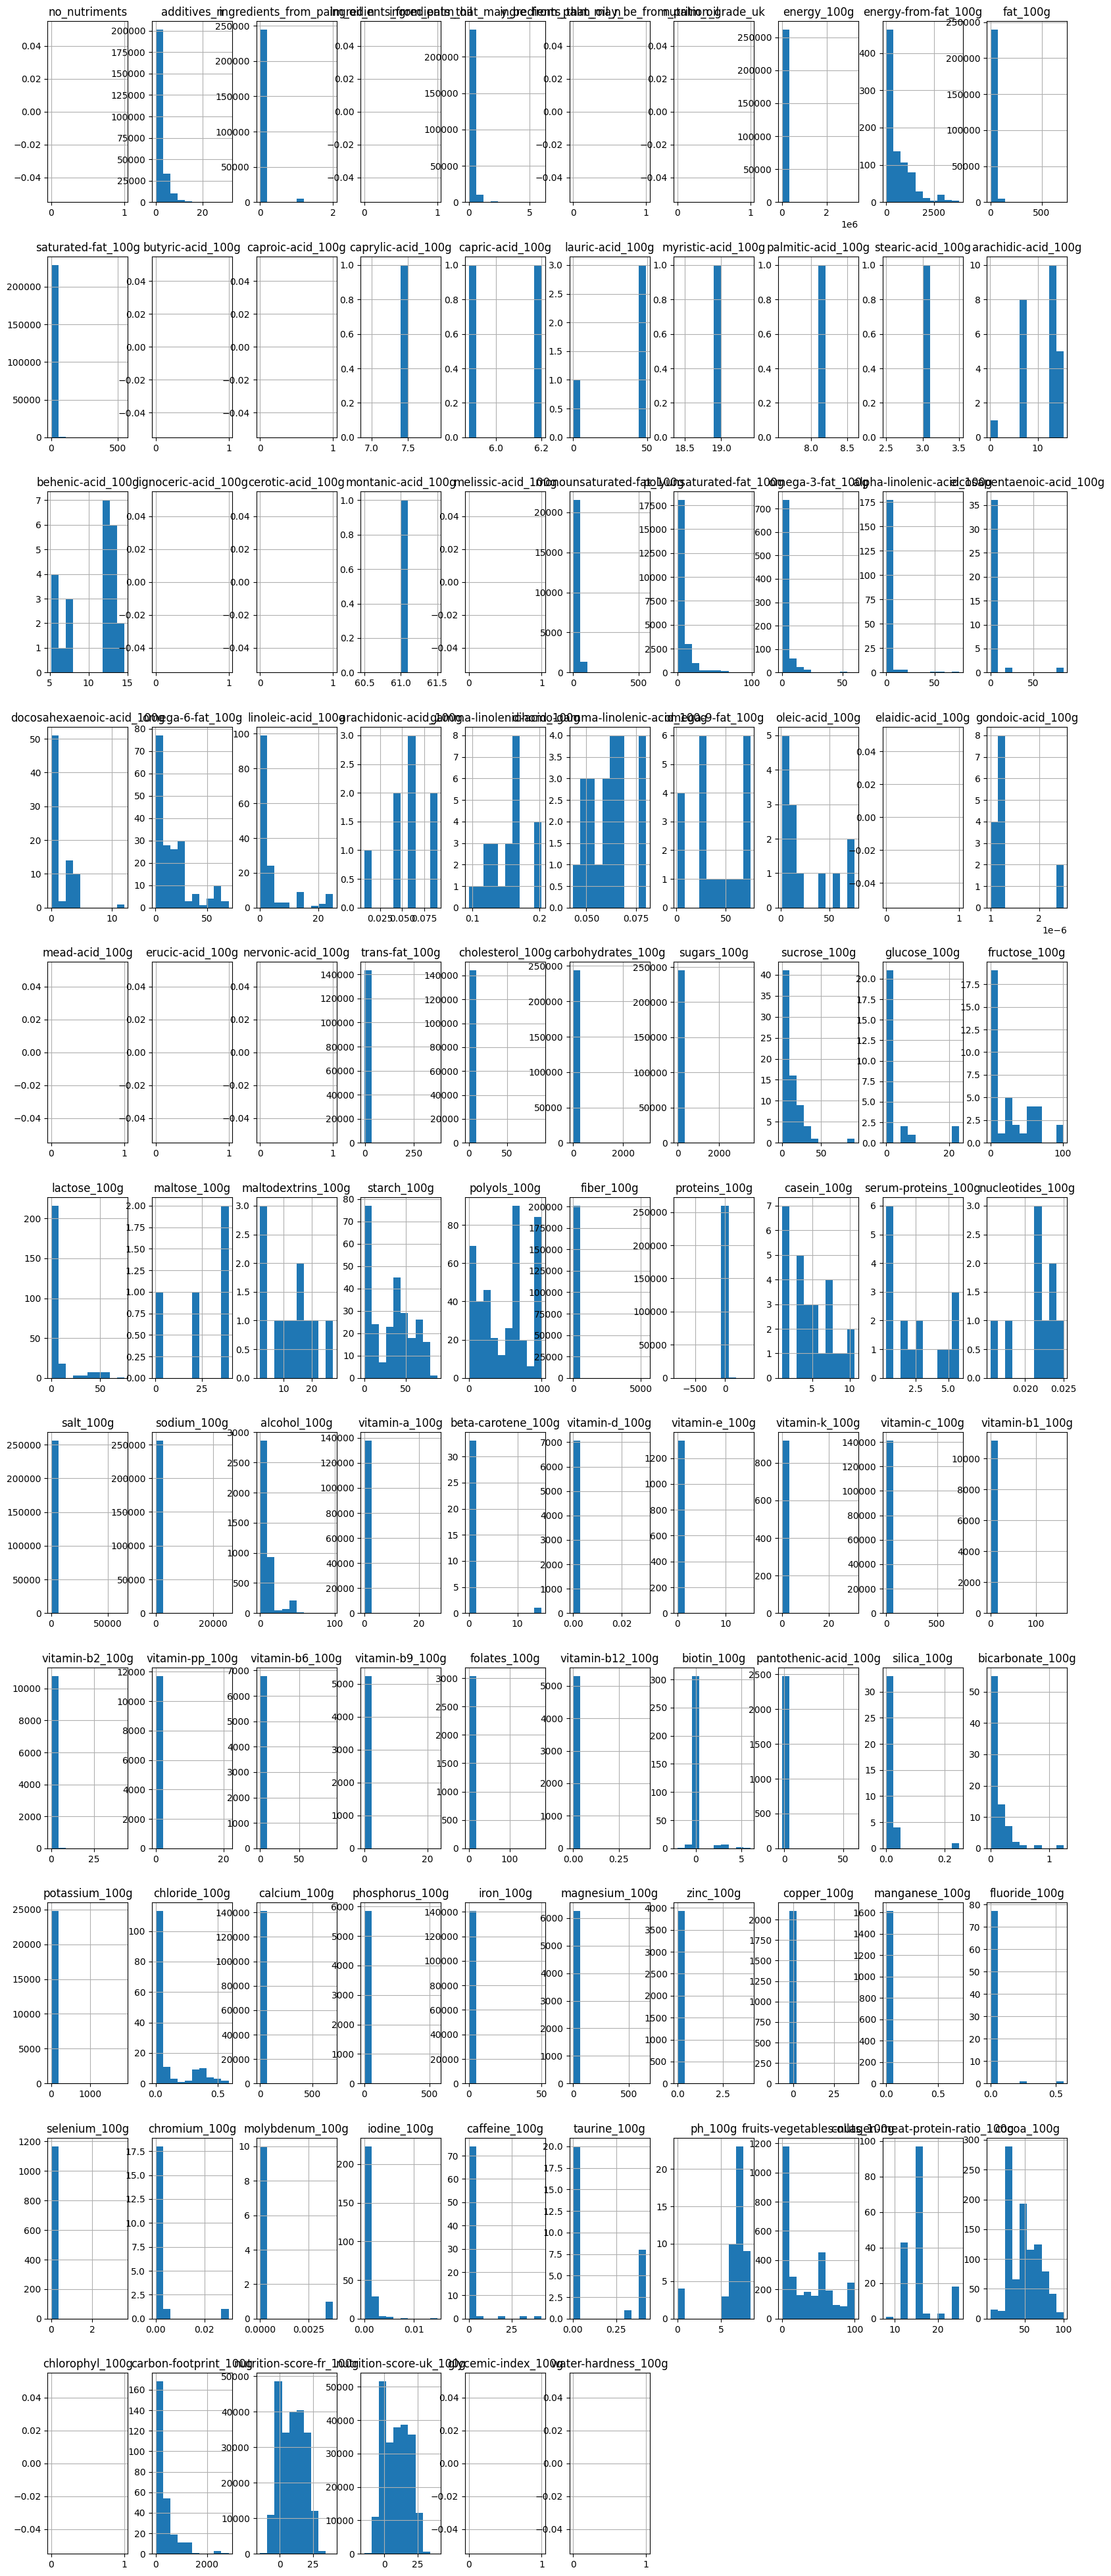

In [19]:
dfs['load_data_130'].hist(figsize=(20, 50))
plt.show()

En spécifiant figsize=(20, 20), j'ai ajusté la taille de l'affichage des histogrammes pour une meilleure lisibilité. Ces graphiques me fournissent une vue d'ensemble rapide de la distribution des données, y compris la symétrie de la distribution, l'existence de valeurs extrêmes (outliers), et la concentration des données. Par exemple, une distribution biaisée vers la droite ou la gauche pourrait influencer la manière dont je traite les données pour les analyses ultérieures, comme la nécessité de normaliser ou de transformer les données. Les visualisations sont un outil puissant pour communiquer les caractéristiques clés des données à des parties prenantes non techniques, facilitant la prise de décisions basée sur les données.

## 1.5 Autre affichage , section de colonnes et découpage

Dans la fonction ci-après nous division notre dataset en par les sections définis dans la documentation

In [22]:
def extract_sections_from_description(file_path):
    sections = {}
    current_section = None

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("#"):
            current_section = line.replace("#", "").strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
            sections[current_section] = []
        elif current_section and ":" in line:
            field_name = line.strip().split(" : ")[0].lower()
            sections[current_section].append(field_name)

    return sections

    print(sections)

# Extraire les sections et descriptions
desc_file_path = "./resources/data-fields.txt"
sections = extract_sections_from_description(desc_file_path)

# Association des données aux descriptions et division par section
section_data = {}
for section, columns in sections.items():
    valid_columns = [col for col in dfs['load_data_130'].columns if any(str(field) == str(col) for field in columns)]
    print(f"valid_columns :: {valid_columns}")

        # Création d'une variable pour chaque section
    section_var_name = section.strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
    dfs[section_var_name+"_150"] = dfs['load_data_130'][valid_columns]
    print(f"Section en cours : {section_var_name}")

for section, df_section in section_data.items():
    print(f"\nSection: {section}")
    # print(df_section.head())

valid_columns :: ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'product_name', 'generic_name', 'quantity']
Section en cours : general_information
valid_columns :: ['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr']
Section en cours : tags
valid_columns :: ['ingredients_text', 'traces', 'traces_tags']
Section en cours : ingredients
valid_columns :: ['serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_f

Nous pouvons appeler chaque section dans la variable global en donnant en clef le nom de la section désirée

In [ ]:
dfs["general_information_150"].head()

In [ ]:
dfs["tags_150"].head()

In [ ]:
dfs["ingredients_150"].head()

In [ ]:
dfs["misc_data_150"].head()

In [ ]:
dfs["nutrition_facts_150"].head()

# 2. Préparation et Nettoyage des Données

## 2.1. Identification des colonnes avec données manquantes

Identification des colonnes avec plus de 50% de données manquantes

In [ ]:
missing_values = dfs['load_data_130'].isnull().sum() / len(df) * 100

Affichage des colonnes avec plus de 50% de valeurs null

In [ ]:
high_missing_values = missing_values[missing_values > 50]
print(f"Columns with more than 50% missing data :\n {high_missing_values}")

## 2.2 Suppression des colonnes avec plus de 50% de valeurs null

In [ ]:
columns_droped = high_missing_values.index;
dfs['without_missing_values_220'] = dfs['load_data_130'].loc[:, df.isnull().mean() < .5]

print(f"Columns deleted : \n{columns_droped}")
print(f"Df length after deletion : {dfs['without_missing_values_220'].shape}")

In [ ]:
dfs['without_missing_values_220'].head()

## 2.3 Évaluation de la pertinence des colonnes restantes

Dans cette partie nous allons décider quelles colonnes il est pertinent de garder pour notre analyse. Nous le faisons manuellement nous pourrions utiliser un modèle comme ChatGPT qui nous renverrais un taux de pertinence en fonction du sujet abordé.

In [ ]:
dfs['without_missing_values_220'].columns.tolist()

La sélection des colonnes a été guidée par leur importance dans le contexte de notre sujet d'étude et par leur potentiel à fournir des insights significatifs.

Les colonnes retenues sont celles qui apportent une valeur ajoutée à notre analyse, en nous permettant de comprendre les caractéristiques nutritionnelles des produits, leur origine, ainsi que des informations spécifiques telles que le nom du produit, la marque, et le code produit qui peuvent être cruciaux pour identifier des relations ou des tendances spécifiques dans les données.

Pour effectuer cette sélection et ce découpage, nous utilisons le code suivant :

In [ ]:
columns_to_keep = ["code","product_name","brands","countries_fr","additives_n","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g"]
dfs['selected_data_230'] = dfs['without_missing_values_220'][columns_to_keep]
dfs['selected_data_230'].columns.tolist()

# 3. Nettoyage Approfondi des Données

## 3.1. Gestion des valeurs manquantes et doublons

### 3.1.1. Suppression des lignes nulles pour des colonnes clés

Car sans valeurs aucune valeurs ne peut y etre associé

In [ ]:
print(f"Data frame infos before deleting null values: {dfs['selected_data_230'].shape}")

dfs['delete_empty_rows_311'] = dfs['selected_data_230'].dropna(subset=['product_name', 'code'])

print(f"Data frame infos after delete null values: {dfs['delete_empty_rows_311'].shape}")

NameError: name 'dfs' is not defined

### 3.1.2. Suppression des doublons basés sur des identifiants uniques

Le code est l'identifiant unique d'un produit, un doublon de cette valeur indiquerais une erreur, une fausse observation (ici record)

In [ ]:
print(f"Data frame infos before deleting duplicates of `code` : {dfs['delete_empty_rows_311'].shape}")

dfs['delete_empty_rows_on_id_312'] = dfs['delete_empty_rows_311'].drop_duplicates(subset='code')

print(f"Data frame infos after delete duplicates of `code`: {dfs['delete_empty_rows_on_id_312'].shape}")

## 3.2 Traitement des valeurs aberrantes


Dans cette partie de mon notebook, j'ai abordé un aspect crucial de la préparation des données : le traitement des valeurs aberrantes, en particulier pour les colonnes contenant des mesures nutritionnelles exprimées par 100g. Voici comment j'ai procédé et pourquoi :

Le but ici était de nettoyer les données pour les analyses nutritionnelles en éliminant les valeurs non plausibles. J'ai identifié que les colonnes pertinentes pour cette opération étaient celles se terminant par _100g, car elles représentent les mesures nutritionnelles par 100 grammes d'un produit, un standard dans l'industrie alimentaire.

In [ ]:
# Getting finished by _100g columns....
dfs["numeric_cols_320"] = dfs['delete_empty_rows_on_id_312'].columns[dfs['delete_empty_rows_on_id_312'].columns.str.endswith('_100g')]

### 3.2.1. Détection et traitement des outliers

In [ ]:
for col in dfs["numeric_cols_320"]:
    if col != 'salt_100g':
        dfs['handling_outliers_321'][col] = np.where(dfs["numeric_cols_320"][col] >= 100, np.nan, dfs["numeric_cols_320"][col])

Pour les colonnes de composants, sauf celle concernant le sel (salt_100g), j'ai mis en place un processus de détection et de gestion des valeurs aberrantes. J'ai défini une valeur seuil au-delà de laquelle les mesures nutritionnelles ne sont pas plausibles. Les valeurs excédant ce seuil ont été remplacées par NaN pour signaler une donnée aberrante ou une erreur de saisie.

### 3.2.2. Gestion des NAN et valeurs aberrantes pour certaines mesures

Avec cette ligne, j'ai sélectionné uniquement les colonnes dont les noms se terminent par _100g, ce qui me permet de cibler précisément les données nutritionnelles.

In [ ]:
for col in dfs['handling_outliers_321']:
    ## Numeric conversion...
    dfs['numeric_cols_converted_322'][col] = pd.to_numeric(dfs['handling_outliers_321'][col], errors='coerce')
    # Replacement of extreme value by NaN value
    dfs['numeric_cols_extreme_values_remplaced_322'][col] = dfs['delete_empty_rows_on_id_312'][col].apply(lambda x: np.nan if x <= 0 or x > 100 else x)

Ensuite, j'ai converti les valeurs de ces colonnes en numérique, en utilisant pd.to_numeric avec l'argument errors='coerce'. Cela transforme les valeurs qui ne peuvent pas être converties en nombres (comme des chaînes de texte erronées) en valeurs NaN (Not a Number), ce qui facilite leur gestion ultérieure.

J'ai appliqué une fonction lambda pour remplacer les valeurs extrêmes par des valeurs NaN. La logique derrière est que pour une mesure nutritionnelle par 100 grammes, il est impossible d'avoir une valeur inférieure ou égale à 0 ou supérieure à 100. Une telle valeur serait non seulement non physique mais indiquerait également une erreur de saisie ou une anomalie dans les données. Par exemple, un pourcentage de matière grasse de -5% ou de 150% par 100 grammes n'est pas plausible.

In [ ]:
dfs['numeric_cols_extreme_values_remplaced_322'].head()

## 3.3 Normalisation et transformation des données

### 3.3.1 Normalisation des données numériques

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfs['normalized_numeric_data_331'][dfs['numeric_cols_extreme_values_remplaced_322'].select_dtypes(include=['number']).columns] = scaler.fit_transform(dfs['numeric_cols_extreme_values_remplaced_322'].select_dtypes(include=['number']))

J'ai utilisé le MinMaxScaler de sklearn.preprocessing pour normaliser les données numériques. Cette technique redimensionne les features pour qu'elles se situent dans un intervalle donné, ici entre 0 et 1, facilitant ainsi les comparaisons et la modélisation sans altérer la distribution des données.

### 3.3.2 Normalisation des données textuelles

In [ ]:
normalize_text = lambda value: value if pd.isna(value) else value.strip().lower()

In [ ]:
dfs['normalized_string_data_332'][dfs['normalized_numeric_data_331'].select_dtypes(include=['object']).columns] = dfs['normalized_numeric_data_331'].select_dtypes(include=['object']).apply(lambda x: x.str.lower().str.strip())

Pour les données textuelles, j'ai appliqué une fonction lambda pour transformer toutes les chaînes de caractères en minuscules et supprimer les espaces inutiles. Cette étape assure une uniformité des textes, réduisant le risque de duplications ou d'incohérences dues à des différences de casse ou à des espaces superflus.

## 3.4. Validation de la cohérence des données

Cette phase a été cruciale pour garantir l'intégrité des données avant l'analyse.

### 3.4.1. Vérification des valeurs numériques

J'ai défini des plages de valeurs acceptables pour les mesures nutritionnelles et utilisé des assertions pour vérifier que toutes les données se situent bien dans ces plages. Cela permet d'éviter l'analyse de données non plausibles ou erronées.

In [ ]:
energy_min, energy_max = 0, 900  # Basic range for 100g
assert dfs['normalized_string_data_332']['energy_100g'].dropna().between(energy_min, energy_max).all(), "Out of order"

In [ ]:
nutrient_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
for col in nutrient_cols:
    assert dfs['normalized_string_data_332'][col].dropna().ge(0).all(), f"Valeurs négatives détectées dans {col}"

### 3.4.2. Cohérence des données additives

J'ai vérifié que le nombre d'additifs (additives_n) était logique, c'est-à-dire non négatif, renforçant la qualité des informations relatives aux additifs.

In [ ]:
assert dfs['normalized_string_data_332']['additives_n'].dropna().ge(0).all(), "Valeurs négatives trouvées dans additives_n"

### 3.4.3. Vérification de la cohérence des grades de nutriscore

### 3.4.4. Contrôle des estimations


### 3.4.5. Vérification de la cohérence des noms de produits et marques

### 3.4.6. Vérification des noms de pays

Pour assurer la validité des noms de pays, j'ai utilisé la bibliothèque pycountry pour comparer les pays mentionnés dans le dataset avec une liste officielle de pays. Cela m'a aidé à identifier et exclure les valeurs incorrectes ou fantaisistes.

In [ ]:
list_countries = [country.name.lower() for country in pycountry.countries]

def is_valid_country(country):
    if isinstance(country, str):
        return country.lower() in list_countries
    else:
        return False

dfs['checkings_country_name']['countries_fr'] = dfs['normalized_string_data_332']['countries_fr'].dropna()
dfs['checkings_country_name']['countries_fr'] = dfs['normalized_string_data_332']['countries_fr'].apply(is_valid_country)
dfs['checkings_country_name']['countries_fr'] = dfs['normalized_string_data_332']['countries_fr'] != False

In [ ]:
dfs['checkings_country_name'].head()

### 3.4.7. Validation des codes produits

J'ai également validé la longueur des codes produits pour qu'ils correspondent au format standard (par exemple, EAN-13), ce qui est essentiel pour l'identification unique des produits.

In [ ]:
code_length_check = dfs['checkings_country_name'].astype(str).str.len().eq(13)
print(f"Code checking ... ${code_length_check}")

print(f"Deleting invalides codes...")
dfs['validation_of_product_codes'] = dfs['checkings_country_name'][code_length_check]

In [ ]:
assert dfs['validation_of_product_codes']['code'].astype(str).str.len().eq(13).all(), "Codes produits de longueur incohérente"

# 4. Imputation des Valeurs Manquantes

La gestion des valeurs manquantes est un aspect crucial du prétraitement des données. J'ai exploré différentes stratégies d'imputation :

## 4.1. Imputation par la médiane

Ces méthodes simples remplacent les valeurs manquantes par la médiane ou la moyenne de la colonne, respectivement. Elles sont efficaces pour maintenir la distribution générale des données sans introduire un biais significatif.

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

## 4.2. Imputation par la moyenne

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

## 4.3. Imputation par KNN

Pour une approche plus nuancée, j'ai utilisé l'imputation KNN, qui remplace les valeurs manquantes en se basant sur les voisins les plus proches. Cela permet une imputation plus précise qui prend en compte la similarité entre les observations.

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

En appliquant ces méthodes, je m'assure que mon dataset est non seulement propre et cohérent mais aussi complet, me permettant de procéder à des analyses plus fiables et significatives.

In [1]:
df.head()

NameError: name 'df' is not defined

In [2]:
from sklearn.impute import KNNImputer

def impute_numeric_columns(df, suffix="_100g"):
    # Sélectionner les colonnes numériques qui se terminent par le suffixe donné
    num_cols = df.select_dtypes(include=['number'])
    cols_to_impute = [col for col in num_cols.columns if col.endswith(suffix)]

    # Vérifier si la sélection de colonnes n'est pas vide
    if not cols_to_impute:
        print("Aucune colonne numérique avec le suffixe spécifié trouvée.")
        return df

    # Appliquer KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

    return df

# Appliquer la fonction à votre DataFrame
df = impute_numeric_columns(df)

NameError: name 'df' is not defined

In [ ]:
df.shape

# 5. Vérification Post-Imputation

## 5.1. Ré-évaluation des statistiques descriptives

In [ ]:
df.describe()

## 5.2. Vérification de la distribution des données imputées

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution après imputation pour {col}")
    plt.show()

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

# 6. Exportation des Données Nettoyées

## 6.1. Préparation du format de sortie

## 6.2. Exportation des données nettoyées pour une utilisation ultérieure

In [ ]:
from datetime import datetime

now = datetime.now()

df.to_csv('./drive/MyDrive/test_notebook/exports/cleaned_data_'+formatted_date+'.csv', index=False)